## Initialize dataframes

In [7]:
from Startup import *

finished standard imports
dict_items([('spark.cores.max', '4'), ('spark.logConf', 'True'), ('spark.app.name', 'Weather_PCA'), ('spark.default.parallelism', '10'), ('spark.executor.memory', '3g'), ('spark.executor.cores', '1')])
started SparkContext and SQLContext in 14.46 seconds
loaded weather.parquet in 7.61 seconds
loaded stations.parquet in 0.20 seconds
registered dataframes as tables in 0.21 seconds


In [8]:
%%time
print('df has %d rows, stations has %d rows'%(df.count(),stations.count()))

df has 9358394 rows, stations has 85284 rows
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.13 s


## Check how many rows corresponds to each measurement

In [2]:
%%time
query="""
SELECT measurement,COUNT(measurement) AS count
FROM weather  
GROUP BY measurement 
ORDER BY count
"""
print(query)
measurements_pdf=sqlContext.sql(query).toPandas()


SELECT measurement,COUNT(measurement) AS count
FROM weather  
GROUP BY measurement 
ORDER BY count

CPU times: user 8 ms, sys: 8 ms, total: 16 ms
Wall time: 18.1 s


In [3]:
measurements_pdf.tail(20)

,measurement,count
113,WT14,38369
114,WT18,53072
115,WT08,53648
116,WESD,55740
117,WT16,73840
118,WT06,103479
119,WT11,120277
120,WT05,148289
121,WT04,163690
122,DWPR,180462


## The most populated measurements
* The most populated measurements are the ones which we have been looking at: `PRCP,TMIN,TMAX,SNWD,TOBS`
* After those the most common ones are **weather types**. These are binary features that describe the daily weather qualitatively.

## Weather-Type Fields (WT**)

(from `/mnt/workspace/WeatherInfo/ghcnd-readme.txt`)

           WT** = Weather Type where ** has one of the following values:

                  01 = Fog, ice fog, or freezing fog (may include heavy fog)
                  02 = Heavy fog or heaving freezing fog (not always
                       distinquished from fog)
                  03 = Thunder
                  04 = Ice pellets, sleet, snow pellets, or small hail
                  05 = Hail (may include small hail)
                  06 = Glaze or rime
                  07 = Dust, volcanic ash, blowing dust, blowing sand, or
                       blowing obstruction
                  08 = Smoke or haze
                  09 = Blowing or drifting snow
                  10 = Tornado, waterspout, or funnel cloud
                  11 = High or damaging winds
                  12 = Blowing spray
                  13 = Mist
                  14 = Drizzle
                  15 = Freezing drizzle
                  16 = Rain (may include freezing rain, drizzle, and
                       freezing drizzle)
                  17 = Freezing rain
                  18 = Snow, snow pellets, snow grains, or ice crystals
                  19 = Unknown source of precipitation
                  21 = Ground fog
                  22 = Ice fog or freezing fog

* *Possibe Question*: The categries have probably chosen by a human not by a formula. Can we model the join distribution of all of these ccategories? In other words, is catergory $i$ approximately a subset of category $j$? are they disjoint?

## MDPR, MWPR, DAPR

(from `/mnt/workspace/WeatherInfo/ghcnd-readme.txt`)

* **MDPR** = Multiday precipitation total (tenths of mm; use with DAPR and DWPR, if available)
* **DAPR** = Number of days included in the multiday precipiation total (MDPR)
* **DWPR** = Number of days with non-zero precipitation included in multiday precipitation total (MDPR)
                  
Taking the multiday total is similar to smoothing. A smoothed precipitation graph is easier to analyze using PCA.

## Visualizing weather types

In [ ]:
%%time
station='USW00093819'
query="""
SELECT *
FROM weather
WHERE measurement='WT01' and station='%s'
"""%station
print(query)
WT01_df=sqlContext.sql(query)
WT01_pdf=WT01_df.toPandas()

In [ ]:
WT01_pdf.head(4)

In [ ]:
%pylab inline

In [ ]:
wt01_graphs=[]
for i in range(WT01_pdf.shape[0]):
    graph=unpackArray(WT01_pdf.iloc[i,3],np.float16)
    graph=np.nan_to_num(graph)
    wt01_graphs.append(graph)
wt01_graphs=np.stack(wt01_graphs)

In [ ]:
from lib.YearPlotter import YearPlotter
W=wt01_graphs[:4,:]
fig, ax = plt.subplots(figsize=[10,10]);
YP=YearPlotter()
YP.plot(W.transpose(),fig,ax,title='WT01, %s'%(station));
#plt.savefig('percipitation.png')
#title('A sample of graphs');

## okay new stuff

In [5]:
df.show()

+-----------+-----------+----+--------------------+
|    Station|Measurement|Year|              Values|
+-----------+-----------+----+--------------------+
|USW00093819|       WDFM|1972|[38 58 EC 5C 38 5...|
|USW00093819|       WDFM|1973|[38 5C EC 5C 08 5...|
|USW00093819|       WDFM|1974|[EC 5C A0 51 EC 5...|
|USW00093819|       WDFM|1975|[EC 5C 38 58 38 5...|
|USW00093819|       WDFM|1976|[38 58 38 58 38 5...|
|USW00093819|       WDFM|1977|[EC 5C 38 5C A0 5...|
|USW00093819|       WDFM|1978|[38 5C 08 5B EC 5...|
|USW00093819|       WDFM|1979|[EC 5C 38 5C 08 5...|
|USW00093819|       WESD|1952|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1953|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1954|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1955|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1956|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1957|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1958|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1959|[00 7E 00 7E 00 7...|
|USW00093819

In [6]:
stations.show()

+-----------+--------+---------+---------+-----+-------------+-------+-------+-----+
|         ID|latitude|longitude|elevation|state|         name|GSNFLAG|HCNFLAG|WMOID|
+-----------+--------+---------+---------+-----+-------------+-------+-------+-----+
|US1COLR0185|  40.711|-105.1144|   1599.0|   CO|WELLINGTON 5.|       |       |     |
|US1COLR0186| 40.8135|-105.0963|   1601.7|   CO|BUCKEYE 0.9 S|       |       |     |
|US1COLR0187| 40.7689| -105.064|   1653.8|   CO|WELLINGTON 5.|       |       |     |
|US1COLR0189|  40.689|-105.0242|   1594.1|   CO|WELLINGTON 1.|       |       |     |
|US1COLR0193| 40.6711|-105.0639|   1584.0|   CO|WELLINGTON 3.|       |       |     |
|US1COLR0196|  40.691|-105.0157|   1581.9|   CO|WELLINGTON 0.|       |       |     |
|US1COLR0197|  40.625|-105.3403|   2464.0|   CO|    BLV 8.0 W|       |       |     |
|US1COLR0200| 40.3345|-105.5127|   2431.1|   CO|ESTES PARK 2.|       |       |     |
|US1COLR0201| 40.4701|-105.4493|   2303.1|   CO|GLEN HAVEN 1.|   

## get the stations that are in California

In [9]:
%%time
query="""
SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='CA'
"""
print(query)
CA_df=sqlContext.sql(query)
sqlContext.registerDataFrameAsTable(CA_df,'CA_df')
CA_pdf=CA_df.toPandas()


SELECT stations.ID, stations.elevation, stations.state
FROM stations
WHERE stations.state='CA'

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 691 ms


In [10]:
CA_pdf.head()

,ID,elevation,state
0,USC00040006,601.1,CA
1,USC00040010,26.5,CA
2,USC00040014,863.5,CA
3,USC00040024,869.0,CA
4,USC00040029,1278.6,CA


## now get the weather for all the stations in california

In [11]:
%%time
query="""
SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='CA' AND weather.Measurement='SNOW'
"""

print(query)
CA_weather_df=sqlContext.sql(query)
CA_weather_pdf=CA_weather_df.toPandas()
sqlContext.registerDataFrameAsTable(CA_weather_df,'CA_weather_df')
# CA_weather_df.show()
CA_weather_pdf.head()


SELECT stations.ID, stations.elevation, stations.state, 
        weather.Station, weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state='CA' AND weather.Measurement='SNOW'

CPU times: user 452 ms, sys: 40 ms, total: 492 ms
Wall time: 34.8 s


In [12]:
CA_weather_pdf.head()

,ID,elevation,state,Station,Measurement,Year,Values
0,USC00042239,1414.3,CA,USC00042239,SNOW,1899,"[0, 0, 64, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,USC00042239,1414.3,CA,USC00042239,SNOW,1900,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12..."
2,USC00042239,1414.3,CA,USC00042239,SNOW,1901,"[64, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,USC00042239,1414.3,CA,USC00042239,SNOW,1902,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12..."
4,USC00042239,1414.3,CA,USC00042239,SNOW,1903,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12..."


## should we consider some specific stations to look at?

In [13]:
%%time
query="""
SELECT Station, COUNT(Station) as count
FROM CA_weather_df
GROUP BY Station
ORDER BY count
"""

print(query)
counts_df=sqlContext.sql(query)
counts_pdf=counts_df.toPandas()
# CA_weather_df.show()
counts_pdf.head()


SELECT Station, COUNT(Station) as count
FROM CA_weather_df
GROUP BY Station
ORDER BY count

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 24.6 s


In [43]:
counts_pdf.tail()

,Station,count
1801,USC00048702,110
1802,USC00042239,113
1803,USC00047195,118
1804,USC00041614,120
1805,USC00046136,120


## okay now we need to make some graphs

In [56]:
%%time

## let's look at average snowpack for stations for el nino years vs not
## el nino years are: 1982-1983, 1997-1998 <-- strongest according to wikipedia
import matplotlib as plt


#unpackArray(pandas_df.loc['TMAX_s20','Values'],np.float16)/10
data1997 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1997) & (CA_weather_pdf['ID']=='USC00047195')]
# data = CA_weather_pdf.loc[(CA_weather_pdf['ID']=='USC00046290')]

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.11 ms


In [57]:
data1997.head()

,ID,elevation,state,Station,Measurement,Year,Values
34671,USC00047195,1042.4,CA,USC00047195,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


0.345205479452


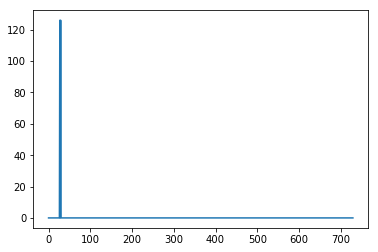

730


In [58]:
import matplotlib.pyplot as plt
import numpy as np

asf = [float(a) for a in data1997['Values'].values[0]]
print(np.mean(asf))
x = np.arange(start=0, stop=len(asf))
plt.plot(x, asf)
plt.show()

print(len(asf))

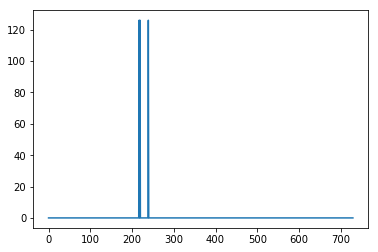

730
0.517808219178
378.0


In [67]:
data1997 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1995) & (CA_weather_pdf['ID']=='USC00047195')]
asf = [float(a) for a in data1997['Values'].values[0]]
x = np.arange(start=0, stop=len(asf))
plt.plot(x, asf)
plt.show()

print(len(asf))
print(np.mean(asf))

print(sum(asf))

## let's look at TOTAL snowpack for stations for el nino years vs not

In [78]:
totalSnowpack1997 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1997)] # 43886 measurements
totalSnowpack1997

,ID,elevation,state,Station,Measurement,Year,Values
97,USC00042239,1414.3,CA,USC00042239,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 0, 0, 0,..."
131,USC00045790,75.0,CA,USC00045790,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
207,USC00042574,661.4,CA,USC00042574,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
308,USC00046960,563.9,CA,USC00046960,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
424,USC00047672,424.3,CA,USC00047672,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
508,USC00047851,93.9,CA,USC00047851,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
570,USW00093115,7.3,CA,USW00093115,SNOW,1997,"[0, 126, 0, 0, 0, 0, 0, 126, 0, 126, 0, 0, 0, ..."
599,USC00049440,68.3,CA,USC00049440,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
687,USC00047085,1478.3,CA,USC00047085,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
790,USC00046168,27.4,CA,USC00046168,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [84]:
def totalSnowFall(row):
    asf = [float(a) for a in row['Values']]
    return sum(asf)

totalSnowpack1997['totalSnow'] = totalSnowpack1997.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1997.sort_values(by='totalSnow', ascending=False)

/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ID,elevation,state,Station,Measurement,Year,Values,totalSnow
35573,USW00024283,61.0,CA,USW00024283,SNOW,1997,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42084.0
31889,USC00042756,2939.8,CA,USC00042756,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42084.0
19748,USW00023174,29.6,CA,USW00023174,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",38556.0
14557,USC00049822,1828.8,CA,USC00049822,SNOW,1997,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",35339.0
41025,USW00023188,4.6,CA,USW00023188,SNOW,1997,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",34398.0
28294,USC00042331,1592.6,CA,USC00042331,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",31072.0
2841,USC00046165,426.7,CA,USC00046165,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",30870.0
5978,USC00044259,-6.4,CA,USC00044259,SNOW,1997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",26964.0
16153,USC00048829,1286.3,CA,USC00048829,SNOW,1997,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",26890.0
38849,USC00042728,217.9,CA,USC00042728,SNOW,1997,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",26712.0


In [96]:
totalSnowpack1998 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1998)]
totalSnowpack1998['totalSnow'] = totalSnowpack1998.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1998.sort_values(by='totalSnow', ascending=False)

/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,ID,elevation,state,Station,Measurement,Year,Values,totalSnow
17024,USW00024257,151.5,CA,USW00024257,SNOW,1998,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 64, 7...",46006.0
31807,USW00023190,2.7,CA,USW00023190,SNOW,1998,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",45864.0
41654,US1CAMN0001,2162.3,CA,US1CAMN0001,SNOW,1998,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",45864.0
16241,USC00048406,2920.0,CA,USC00048406,SNOW,1998,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42336.0
9135,USC00040819,2485.3,CA,USC00040819,SNOW,1998,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42210.0
23428,USC00046329,518.2,CA,USC00046329,SNOW,1998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42084.0
15971,USC00044176,2139.7,CA,USC00044176,SNOW,1998,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42084.0
9415,USC00044705,2763.0,CA,USC00044705,SNOW,1998,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42084.0
15777,USC00042406,1066.8,CA,USC00042406,SNOW,1998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",35658.0
7245,USW00093114,18.0,CA,USW00093114,SNOW,1998,"[0, 126, 0, 0, 0, 0, 0, 0, 0, 126, 0, 126, 0, ...",35028.0


In [85]:
totalSnowpack1995 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1995)]
totalSnowpack1995['totalSnow'] = totalSnowpack1995.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1995.sort_values(by='totalSnow', ascending=False)

/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,ID,elevation,state,Station,Measurement,Year,Values,totalSnow
17920,USW00023225,1608.1,CA,USW00023225,SNOW,1995,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42462.0
15969,USC00044176,2139.7,CA,USC00044176,SNOW,1995,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42210.0
28741,USC00041603,432.8,CA,USC00041603,SNOW,1995,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42084.0
18224,USC00044412,1284.7,CA,USC00044412,SNOW,1995,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",39640.0
13091,USC00045352,640.1,CA,USC00045352,SNOW,1995,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",38304.0
41837,USC00048207,1292.4,CA,USC00048207,SNOW,1995,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",35784.0
16239,USC00048406,2920.0,CA,USC00048406,SNOW,1995,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",34650.0
5248,USC00043369,2734.1,CA,USC00043369,SNOW,1995,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",34650.0
9413,USC00044705,2763.0,CA,USC00044705,SNOW,1995,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",34650.0
12576,USC00047050,304.5,CA,USC00047050,SNOW,1995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27090.0


In [86]:
totalSnowpack1996 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1996)]
totalSnowpack1996['totalSnow'] = totalSnowpack1996.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1996.sort_values(by='totalSnow', ascending=False)

/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,ID,elevation,state,Station,Measurement,Year,Values,totalSnow
15970,USC00044176,2139.7,CA,USC00044176,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",45864.0
15572,USC00043710,1165.9,CA,USC00043710,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42462.0
27733,USC00044232,1204.0,CA,USC00044232,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42462.0
35512,USC00040823,1252.1,CA,USC00040823,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42210.0
20822,USC00048917,347.5,CA,USC00048917,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42084.0
33965,USC00044191,389.5,CA,USC00044191,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",38304.0
31888,USC00042756,2939.8,CA,USC00042756,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",34776.0
9414,USC00044705,2763.0,CA,USC00044705,SNOW,1996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",34650.0
9134,USC00040819,2485.3,CA,USC00040819,SNOW,1996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",34650.0
5249,USC00043369,2734.1,CA,USC00043369,SNOW,1996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",34650.0


## okay now try to make a plot

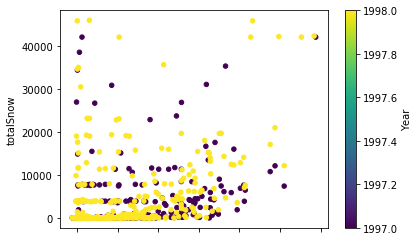

In [109]:
snow19971998 = pd.concat([totalSnowpack1997, totalSnowpack1998])
snow19971998.head()

lines = snow19971998.plot.scatter(x='elevation', y='totalSnow', c='Year', colormap='viridis')
plt.show()

# lines = totalSnowpack1997.plot.scatter(x = 'elevation', y='totalSnow', c="red")
# lines = totalSnowpack1998.plot.scatter(x = 'elevation', y='totalSnow', c="blue")
# plt.show()

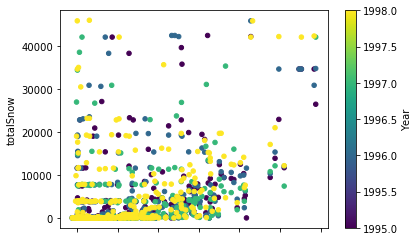

In [110]:
snowAllYears = pd.concat([totalSnowpack1995, totalSnowpack1996, totalSnowpack1997, totalSnowpack1998])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='totalSnow', c='Year', colormap='viridis')
plt.show()

## let's look at february alone

In [113]:
def febSnowFall(row):
    asf = [float(a) for a in row['Values']][60:120]
    return sum(asf)

totalSnowpack1997['febSnow'] = totalSnowpack1997.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1997.sort_values(by='febSnow', ascending=False)

totalSnowpack1998['febSnow'] = totalSnowpack1998.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1998.sort_values(by='febSnow', ascending=False)

totalSnowpack1995['febSnow'] = totalSnowpack1995.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1995.sort_values(by='febSnow', ascending=False)

totalSnowpack1996['febSnow'] = totalSnowpack1996.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1996.sort_values(by='febSnow', ascending=False)

/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,ID,elevation,state,Station,Measurement,Year,Values,totalSnow,febSnow
35117,USC00048873,1615.4,CA,USC00048873,SNOW,1996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 126, 0, 0, 0, 0, 0...",13253.0,4033.0
16300,USC00048380,1538.3,CA,USC00048380,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",16268.0,3784.0
27037,USC00043244,11.6,CA,USC00043244,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",19026.0,3780.0
41838,USC00048207,1292.4,CA,USC00048207,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",19026.0,3780.0
13495,USC00040436,293.2,CA,USC00040436,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",30618.0,3780.0
16528,USC00049285,32.0,CA,USC00049285,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",22806.0,3780.0
8428,USC00041253,242.3,CA,USC00041253,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",19026.0,3780.0
35512,USC00040823,1252.1,CA,USC00040823,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",42210.0,3780.0
15970,USC00044176,2139.7,CA,USC00044176,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",45864.0,3780.0
33965,USC00044191,389.5,CA,USC00044191,SNOW,1996,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",38304.0,3780.0


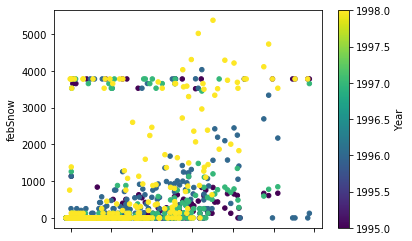

In [114]:
snowAllYears = pd.concat([totalSnowpack1995, totalSnowpack1996, totalSnowpack1997, totalSnowpack1998])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='febSnow', c='Year', colormap='viridis')
plt.show()

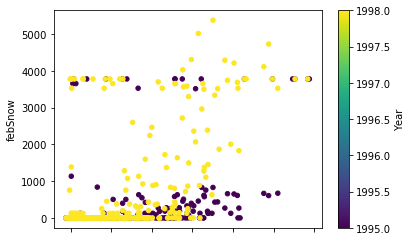

In [115]:
snowAllYears = pd.concat([totalSnowpack1995, totalSnowpack1998])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='febSnow', c='Year', colormap='viridis')
plt.show()

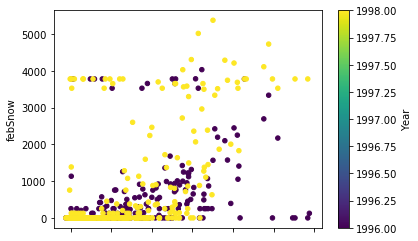

In [118]:
snowAllYears = pd.concat([totalSnowpack1996, totalSnowpack1998])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='febSnow', c='Year', colormap='viridis')
plt.show()

## let's look at the graphs for 1982 and 1983

In [121]:
# make the dataframes

totalSnowpack1982 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1982)]
totalSnowpack1982['totalSnow'] = totalSnowpack1982.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1982['febSnow'] = totalSnowpack1982.apply (lambda row: febSnowFall(row), axis=1)

totalSnowpack1983 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1983)]
totalSnowpack1983['totalSnow'] = totalSnowpack1983.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1983['febSnow'] = totalSnowpack1983.apply (lambda row: febSnowFall(row), axis=1)

totalSnowpack1980 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1980)]
totalSnowpack1980['totalSnow'] = totalSnowpack1980.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1980['febSnow'] = totalSnowpack1980.apply (lambda row: febSnowFall(row), axis=1)

totalSnowpack1981 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1981)]
totalSnowpack1981['totalSnow'] = totalSnowpack1981.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1981['febSnow'] = totalSnowpack1981.apply (lambda row: febSnowFall(row), axis=1)

/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

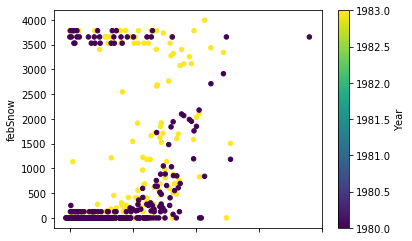

In [122]:
snowAllYears = pd.concat([totalSnowpack1983, totalSnowpack1980])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='febSnow', c='Year', colormap='viridis')
plt.show()

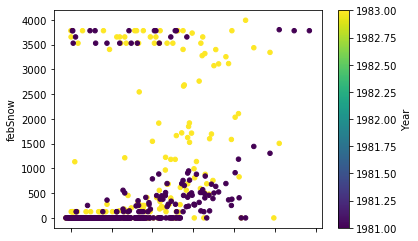

In [123]:
snowAllYears = pd.concat([totalSnowpack1983, totalSnowpack1981])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='febSnow', c='Year', colormap='viridis')
plt.show()

In [126]:
## let's look at january too
def janSnowFall(row):
    asf = [float(a) for a in row['Values']][0:60]
    return sum(asf)

totalSnowpack1982 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1982)]
totalSnowpack1982['totalSnow'] = totalSnowpack1982.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1982['febSnow'] = totalSnowpack1982.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1982['janSnow'] = totalSnowpack1982.apply (lambda row: janSnowFall(row), axis=1)

totalSnowpack1983 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1983)]
totalSnowpack1983['totalSnow'] = totalSnowpack1983.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1983['febSnow'] = totalSnowpack1983.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1983['janSnow'] = totalSnowpack1983.apply (lambda row: janSnowFall(row), axis=1)

totalSnowpack1980 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1980)]
totalSnowpack1980['totalSnow'] = totalSnowpack1980.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1980['febSnow'] = totalSnowpack1980.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1980['janSnow'] = totalSnowpack1980.apply (lambda row: janSnowFall(row), axis=1)

totalSnowpack1981 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1981)]
totalSnowpack1981['totalSnow'] = totalSnowpack1981.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1981['febSnow'] = totalSnowpack1981.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1981['janSnow'] = totalSnowpack1981.apply (lambda row: janSnowFall(row), axis=1)

/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

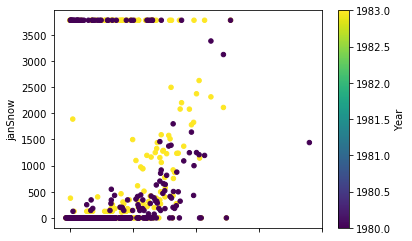

In [127]:
snowAllYears = pd.concat([totalSnowpack1983, totalSnowpack1980])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='janSnow', c='Year', colormap='viridis')
plt.show()

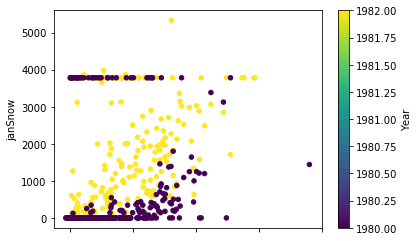

In [129]:
snowAllYears = pd.concat([totalSnowpack1982, totalSnowpack1980])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='janSnow', c='Year', colormap='viridis')
plt.show()

## also look at for 1997-8

In [130]:
totalSnowpack1995 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1995)]
totalSnowpack1995['totalSnow'] = totalSnowpack1995.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1995['febSnow'] = totalSnowpack1995.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1995['janSnow'] = totalSnowpack1995.apply (lambda row: janSnowFall(row), axis=1)

totalSnowpack1996 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1996)]
totalSnowpack1996['totalSnow'] = totalSnowpack1996.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1996['febSnow'] = totalSnowpack1996.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1996['janSnow'] = totalSnowpack1996.apply (lambda row: janSnowFall(row), axis=1)

totalSnowpack1997 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1997)]
totalSnowpack1997['totalSnow'] = totalSnowpack1997.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1997['febSnow'] = totalSnowpack1997.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1997['janSnow'] = totalSnowpack1997.apply (lambda row: janSnowFall(row), axis=1)

totalSnowpack1998 = CA_weather_pdf.loc[(CA_weather_pdf['Year'] == 1998)]
totalSnowpack1998['totalSnow'] = totalSnowpack1998.apply (lambda row: totalSnowFall(row), axis=1)
totalSnowpack1998['febSnow'] = totalSnowpack1998.apply (lambda row: febSnowFall(row), axis=1)
totalSnowpack1998['janSnow'] = totalSnowpack1998.apply (lambda row: janSnowFall(row), axis=1)

/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

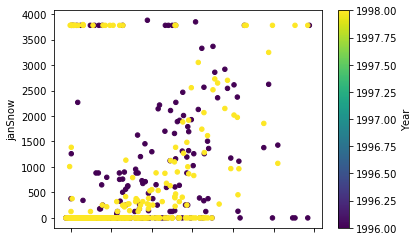

In [131]:
snowAllYears = pd.concat([totalSnowpack1996, totalSnowpack1998])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='janSnow', c='Year', colormap='viridis')
plt.show()

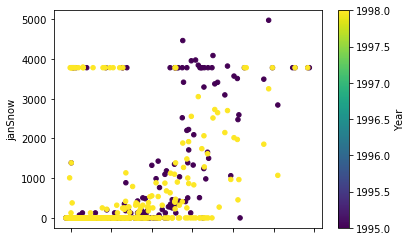

In [132]:
snowAllYears = pd.concat([totalSnowpack1995, totalSnowpack1998])
snowAllYears.head()

lines = snowAllYears.plot.scatter(x='elevation', y='janSnow', c='Year', colormap='viridis')
plt.show()